In [92]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from mdctn import mdct, imdct

from scipy.signal.windows import kaiser_bessel_derived as kbd

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

Text(0.5, 1.0, 'Original image in graymap')

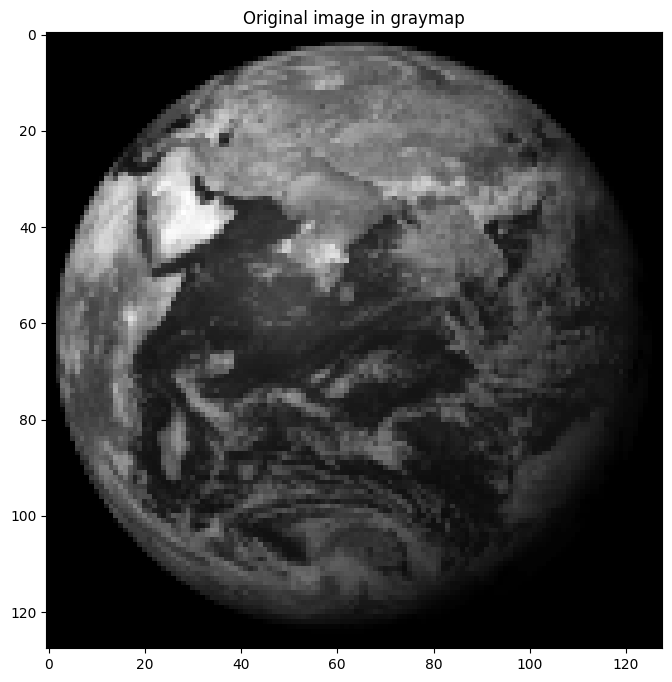

In [93]:
y, cb, cr = Image.open('images/earth-128.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

In [94]:
dct = np.zeros_like(im, dtype=np.float64)

im -= 128

dct_type = 4
dct_norm = 'ortho'

dct_type = 4
dct_norm = 'forward'

N = 16
N2 = N//2
N4 = N//4

wfltr = kbd(N, 6)
# wfltr = np.ones(N)

for i in range(im.shape[0]):
    dct[i] = mdct(im[i], N, wfltr, type=dct_type, norm=dct_norm)

for i in range(dct.shape[1]):
    dct[:, i] = mdct(dct[:, i], N, wfltr, type=dct_type, norm=dct_norm)

In [95]:
dct_mask = np.zeros((8, 8))

dct_mask = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

# dct_mask = np.ones(64).reshape(8, 8)

for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct[i:(i+8),j:(j+8)] * dct_mask

Text(0.5, 1.0, '8x8 MDCTs of the image')

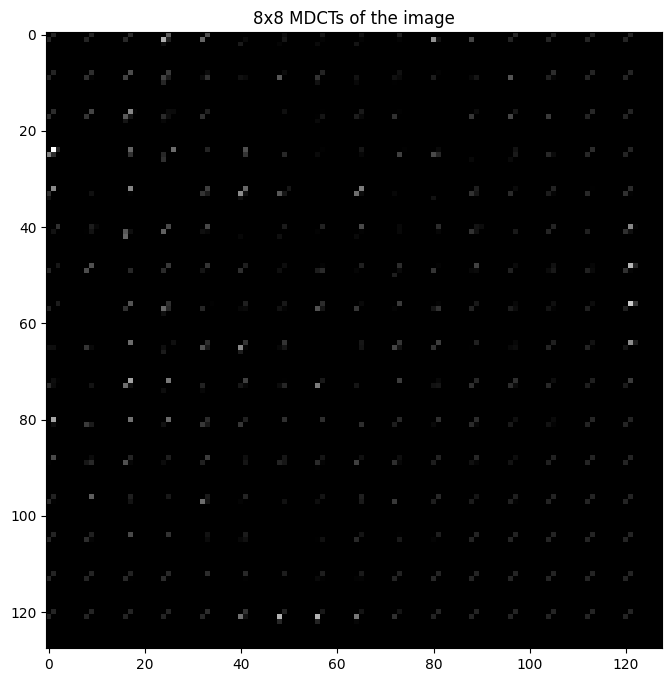

In [96]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*1, vmin=0)
plt.title("8x8 MDCTs of the image")

In [97]:
im_rec = np.zeros_like(im)

for i in range(dct.shape[1]):
    dct[:, i] = imdct(dct[:, i], N, wfltr, type=dct_type, norm=dct_norm)

for i in range(im.shape[0]):
    im_rec[i] = imdct(dct[i], N, wfltr, type=dct_type, norm=dct_norm)

Text(0.5, 1.0, 'Recovered image')

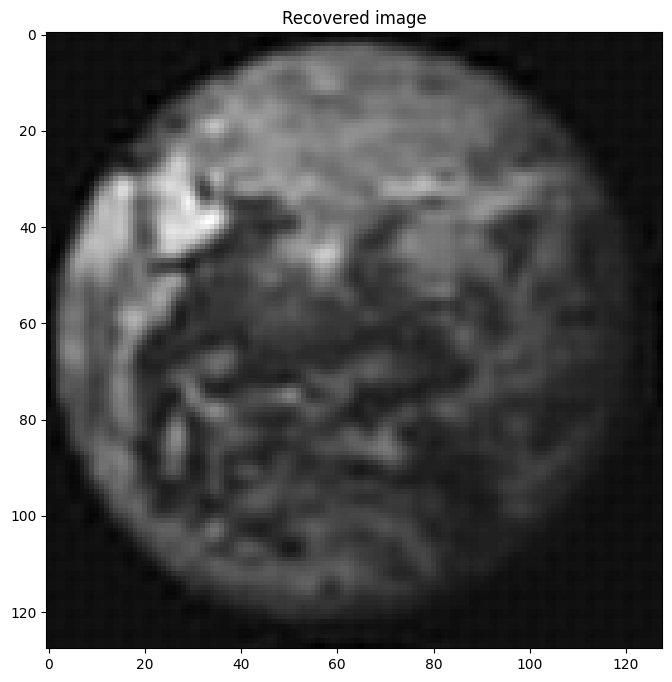

In [98]:
plt.figure()
plt.imshow(im_rec, cmap='gray')
plt.title("Recovered image")